# Análise Exploratória de Dados

<h2><a href="https://www.linkedin.com/in/fabio-henrique-rodrigues?utm_source=share&utm_campaign=share_via&utm_content=profile&utm_medium=android_app " target="_blank">Fabio Henrique Rodrigues</a></h2>

Mais projetos pessoais <a href="https://sites.google.com/view/fabiohenriqueprojetos/in%C3%ADcio" target="_blank">Meu portifolio</a>

---

Análise exploratória de dados usando uma subamostra do dataset de um RH referente ao departamento de Data Science.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings

# Suprime todos os warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('DatasetRH.csv')

## Conhecendo os dados

In [66]:
df.head()

,Id_Funcionario,Idade,Genero,Estado Civil,Departamento,Funcao,Viagem,Valor Diaria,Indice_Envolvimento_Trabalho,Nivel_Satisfacao_Trabalho,...,Numero_Empresas_Anteriores,Disponivel_Hora_Extra,Percentual_Ultimo_Aumento_Salario,Aval_Performance,Anos_Experiencia,Numero_Treinamentos_Ano_Anterior,Anos_na_Empresa,Anos_Funcao_Atual,Anos_Desde_Ultima_Promocao,Anos_com_Gerente_Atual
0,1,41,Mulher,Solteiro,Data Science,Cientista de Dados,Viaja Raramente,1102,3,4,...,8,S,11,3,8,0,6,4,0,5
1,2,49,Homem,Casado,Data Science,Cientista de Dados,Viaja Frequentemente,279,2,2,...,1,N,23,4,10,3,10,7,1,7
2,4,37,Homem,Solteiro,Data Science,Analista de Dados,Viaja Raramente,1373,2,3,...,6,S,15,3,7,3,0,0,0,0
3,5,33,Mulher,Casado,Data Science,Cientista de Dados,Viaja Frequentemente,1392,3,3,...,1,S,11,3,8,3,8,7,3,0
4,7,27,Homem,Casado,Data Science,Analista de Dados,Viaja Raramente,591,3,2,...,9,N,12,3,6,3,2,2,2,2


In [4]:
df.describe(include='object')

,Genero,Estado Civil,Departamento,Funcao,Viagem,Disponivel_Hora_Extra
count,1400,1400,1400,1400,1400,1400
unique,2,3,1,6,3,2
top,Masculino,Casado,Data Science,Cientista de Dados,Viaja Raramente,N
freq,838,634,1400,638,990,1002


In [5]:
df.describe()

,Id_Funcionario,Idade,Valor Diaria,Indice_Envolvimento_Trabalho,Nivel_Satisfacao_Trabalho,Salario_Mensal,Numero_Empresas_Anteriores,Percentual_Ultimo_Aumento_Salario,Aval_Performance,Anos_Experiencia,Numero_Treinamentos_Ano_Anterior,Anos_na_Empresa,Anos_Funcao_Atual,Anos_Desde_Ultima_Promocao,Anos_com_Gerente_Atual
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,975.132857,36.930714,808.441429,2.732143,2.725714,6927.507857,2.705000,15.210000,3.155000,11.285000,2.798571,6.969286,4.197857,2.187143,4.107857
std,573.195664,9.175997,405.165949,0.712672,1.107088,4939.285508,2.498486,3.653727,0.362034,7.831284,1.290311,6.157550,3.613195,3.231255,3.565452
min,1.000000,18.000000,102.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,469.750000,30.000000,468.500000,2.000000,2.000000,2996.000000,1.000000,12.000000,3.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,976.500000,36.000000,809.000000,3.000000,3.000000,5204.000000,2.000000,14.000000,3.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1479.250000,43.000000,1167.250000,3.000000,4.000000,9623.500000,4.000000,18.000000,3.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1971.000000,60.000000,2303.000000,4.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Id_Funcionario                     1400 non-null   int64 
 1   Idade                              1400 non-null   int64 
 2   Genero                             1400 non-null   object
 3   Estado Civil                       1400 non-null   object
 4   Departamento                       1400 non-null   object
 5   Funcao                             1400 non-null   object
 6   Viagem                             1400 non-null   object
 7   Valor Diaria                       1400 non-null   int64 
 8   Indice_Envolvimento_Trabalho       1400 non-null   int64 
 9   Nivel_Satisfacao_Trabalho          1400 non-null   int64 
 10  Salario_Mensal                     1400 non-null   int64 
 11  Numero_Empresas_Anteriores         1400 non-null   int64 
 12  Dispon

In [7]:
df.columns

Index(['Id_Funcionario', 'Idade', 'Genero', 'Estado Civil', 'Departamento',
       'Funcao', 'Viagem', 'Valor Diaria', 'Indice_Envolvimento_Trabalho',
       'Nivel_Satisfacao_Trabalho', 'Salario_Mensal',
       'Numero_Empresas_Anteriores', 'Disponivel_Hora_Extra',
       'Percentual_Ultimo_Aumento_Salario', 'Aval_Performance',
       'Anos_Experiencia', 'Numero_Treinamentos_Ano_Anterior',
       'Anos_na_Empresa', 'Anos_Funcao_Atual', 'Anos_Desde_Ultima_Promocao',
       'Anos_com_Gerente_Atual'],
      dtype='object')

In [8]:
df.shape

(1400, 21)

In [9]:
df.isna().sum()

Id_Funcionario                       0
Idade                                0
Genero                               0
Estado Civil                         0
Departamento                         0
Funcao                               0
Viagem                               0
Valor Diaria                         0
Indice_Envolvimento_Trabalho         0
Nivel_Satisfacao_Trabalho            0
Salario_Mensal                       0
Numero_Empresas_Anteriores           0
Disponivel_Hora_Extra                0
Percentual_Ultimo_Aumento_Salario    0
Aval_Performance                     0
Anos_Experiencia                     0
Numero_Treinamentos_Ano_Anterior     0
Anos_na_Empresa                      0
Anos_Funcao_Atual                    0
Anos_Desde_Ultima_Promocao           0
Anos_com_Gerente_Atual               0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.nunique()

Id_Funcionario                       1400
Idade                                  43
Genero                                  2
Estado Civil                            3
Departamento                            1
Funcao                                  6
Viagem                                  3
Valor Diaria                          866
Indice_Envolvimento_Trabalho            4
Nivel_Satisfacao_Trabalho               4
Salario_Mensal                       1305
Numero_Empresas_Anteriores             10
Disponivel_Hora_Extra                   2
Percentual_Ultimo_Aumento_Salario      15
Aval_Performance                        2
Anos_Experiencia                       40
Numero_Treinamentos_Ano_Anterior        7
Anos_na_Empresa                        37
Anos_Funcao_Atual                      19
Anos_Desde_Ultima_Promocao             16
Anos_com_Gerente_Atual                 18
dtype: int64

In [12]:
df['Genero'] = df['Genero'].replace({'Feminino' : 'Mulher',
                       'Masculino' : 'Homem'})

In [67]:
df.head()

,Id_Funcionario,Idade,Genero,Estado Civil,Departamento,Funcao,Viagem,Valor Diaria,Indice_Envolvimento_Trabalho,Nivel_Satisfacao_Trabalho,...,Numero_Empresas_Anteriores,Disponivel_Hora_Extra,Percentual_Ultimo_Aumento_Salario,Aval_Performance,Anos_Experiencia,Numero_Treinamentos_Ano_Anterior,Anos_na_Empresa,Anos_Funcao_Atual,Anos_Desde_Ultima_Promocao,Anos_com_Gerente_Atual
0,1,41,Mulher,Solteiro,Data Science,Cientista de Dados,Viaja Raramente,1102,3,4,...,8,S,11,3,8,0,6,4,0,5
1,2,49,Homem,Casado,Data Science,Cientista de Dados,Viaja Frequentemente,279,2,2,...,1,N,23,4,10,3,10,7,1,7
2,4,37,Homem,Solteiro,Data Science,Analista de Dados,Viaja Raramente,1373,2,3,...,6,S,15,3,7,3,0,0,0,0
3,5,33,Mulher,Casado,Data Science,Cientista de Dados,Viaja Frequentemente,1392,3,3,...,1,S,11,3,8,3,8,7,3,0
4,7,27,Homem,Casado,Data Science,Analista de Dados,Viaja Raramente,591,3,2,...,9,N,12,3,6,3,2,2,2,2


## Analise de variaveis qualitativas

In [14]:
# Contagem de cada função na area
contagemFunc = df['Funcao'].value_counts().to_frame()
percentualFunc = round((df['Funcao'].value_counts().to_frame() / df.shape[0])*100)
idade_por_departamento = round(df.groupby('Funcao')['Idade'].mean().to_frame())
contagemFunc.columns = ['Contagem']
percentualFunc.columns = ['Percentual %']
idade_por_departamento.columns = ['Media de idade']
resultadoFunc = pd.concat([contagemFunc, percentualFunc, idade_por_departamento], axis=1)
resultadoFunc

,Contagem,Percentual %,Media de idade
Funcao,,,
Cientista de Dados,638,46.0,36.0
Analista de Dados,246,18.0,34.0
Engenheiro de IA,176,13.0,40.0
Arquiteto de Dados,139,10.0,38.0
Engenheiro de Dados,125,9.0,40.0
Engenheiro Analitico,76,5.0,44.0


In [15]:
contagem_viagem = df['Viagem'].value_counts().to_frame()
percentual_viagem = round((df['Viagem'].value_counts().to_frame()/df.shape[0])*100)
contagem_viagem.columns = ['Contagem']
percentual_viagem.columns = ['Percentual %']
resultado_viagem = pd.concat([contagem_viagem, percentual_viagem], axis=1)
resultado_viagem

,Contagem,Percentual %
Viagem,,
Viaja Raramente,990,71.0
Viaja Frequentemente,269,19.0
Apenas Local,141,10.0


In [16]:
contagem_gen = df['Genero'].value_counts().to_frame()
percentual_gen = round((df['Genero'].value_counts().to_frame()/df.shape[0])*100)
contagem_gen.columns = ['Contagem']
percentual_gen.columns = ['Percentil %']
resultado_gen = pd.concat([contagem_gen, percentual_gen], axis=1)
resultado_gen

,Contagem,Percentil %
Genero,,
Homem,838,60.0
Mulher,562,40.0


In [17]:
contagemEC = df['Estado Civil'].value_counts().to_frame()
percentualEC = round((df['Estado Civil'].value_counts().to_frame() / df.shape[0])*100)
idade_mediaEC = round(df.groupby('Estado Civil')['Idade'].mean().to_frame())
contagemEC.columns = ['Contagem']
percentualEC.columns = ['Percentual %']
idade_mediaEC.columns = ['Idade Media']
resultadoEC = pd.concat([contagemEC, percentualEC, idade_mediaEC], axis=1)
resultadoEC

,Contagem,Percentual %,Idade Media
Estado Civil,,,
Casado,634,45.0,38.0
Solteiro,450,32.0,35.0
Divorciado,316,23.0,37.0


In [18]:
hora_extra = df['Disponivel_Hora_Extra'].value_counts().to_frame()
hora_extra.columns = ['Contagem para Hora extra']
hora_extra

,Contagem para Hora extra
Disponivel_Hora_Extra,
N,1002
S,398


## Analise de variaveis quantitativas

In [19]:
df.head(5)

,Id_Funcionario,Idade,Genero,Estado Civil,Departamento,Funcao,Viagem,Valor Diaria,Indice_Envolvimento_Trabalho,Nivel_Satisfacao_Trabalho,...,Numero_Empresas_Anteriores,Disponivel_Hora_Extra,Percentual_Ultimo_Aumento_Salario,Aval_Performance,Anos_Experiencia,Numero_Treinamentos_Ano_Anterior,Anos_na_Empresa,Anos_Funcao_Atual,Anos_Desde_Ultima_Promocao,Anos_com_Gerente_Atual
0,1,41,Mulher,Solteiro,Data Science,Cientista de Dados,Viaja Raramente,1102,3,4,...,8,S,11,3,8,0,6,4,0,5
1,2,49,Homem,Casado,Data Science,Cientista de Dados,Viaja Frequentemente,279,2,2,...,1,N,23,4,10,3,10,7,1,7
2,4,37,Homem,Solteiro,Data Science,Analista de Dados,Viaja Raramente,1373,2,3,...,6,S,15,3,7,3,0,0,0,0
3,5,33,Mulher,Casado,Data Science,Cientista de Dados,Viaja Frequentemente,1392,3,3,...,1,S,11,3,8,3,8,7,3,0
4,7,27,Homem,Casado,Data Science,Analista de Dados,Viaja Raramente,591,3,2,...,9,N,12,3,6,3,2,2,2,2


In [20]:
# Média de idade dos funcionarios do departamento
df['Idade'].mean()

36.93071428571429

In [21]:
# Mediana de idade dos funcionarios do departamento
df['Idade'].median()

36.0

In [22]:
# Moda de idade dos funcionarios do departamento
df['Idade'].mode()

0    34
Name: Idade, dtype: int64

In [23]:
# Desvio padrão, Também é uma medida de dispersão, mas indica o quanto os valores diferem da média em unidades originais dos dados.
df['Idade'].std()

9.175996567080833

In [24]:
df.describe()

,Id_Funcionario,Idade,Valor Diaria,Indice_Envolvimento_Trabalho,Nivel_Satisfacao_Trabalho,Salario_Mensal,Numero_Empresas_Anteriores,Percentual_Ultimo_Aumento_Salario,Aval_Performance,Anos_Experiencia,Numero_Treinamentos_Ano_Anterior,Anos_na_Empresa,Anos_Funcao_Atual,Anos_Desde_Ultima_Promocao,Anos_com_Gerente_Atual
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,975.132857,36.930714,808.441429,2.732143,2.725714,6927.507857,2.705000,15.210000,3.155000,11.285000,2.798571,6.969286,4.197857,2.187143,4.107857
std,573.195664,9.175997,405.165949,0.712672,1.107088,4939.285508,2.498486,3.653727,0.362034,7.831284,1.290311,6.157550,3.613195,3.231255,3.565452
min,1.000000,18.000000,102.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,469.750000,30.000000,468.500000,2.000000,2.000000,2996.000000,1.000000,12.000000,3.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,976.500000,36.000000,809.000000,3.000000,3.000000,5204.000000,2.000000,14.000000,3.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1479.250000,43.000000,1167.250000,3.000000,4.000000,9623.500000,4.000000,18.000000,3.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1971.000000,60.000000,2303.000000,4.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [25]:
#Tabela de agrupamento de Função, genero, nivel de Satisfação e conatgem dos generos
media_nota = df.groupby(['Funcao','Genero']).agg({'Nivel_Satisfacao_Trabalho' : 'mean'})
contagem_genero = df.groupby(['Funcao', 'Genero']).size().reset_index(name='contagem de Genero')
resultado_final = media_nota.merge(contagem_genero, on=['Funcao','Genero'])
resultado_final

,Funcao,Genero,Nivel_Satisfacao_Trabalho,contagem de Genero
0,Analista de Dados,Homem,2.713415,164
1,Analista de Dados,Mulher,2.585366,82
2,Arquiteto de Dados,Homem,2.800000,70
3,Arquiteto de Dados,Mulher,2.637681,69
4,Cientista de Dados,Homem,2.794872,390
5,Cientista de Dados,Mulher,2.657258,248
6,Engenheiro Analitico,Homem,2.787234,47
7,Engenheiro Analitico,Mulher,2.517241,29
8,Engenheiro de Dados,Homem,2.760000,75
9,Engenheiro de Dados,Mulher,2.820000,50


In [26]:
df['Nivel_Satisfacao_Trabalho'].value_counts().to_frame()

,count
Nivel_Satisfacao_Trabalho,
4,439
3,417
1,279
2,265


In [27]:
media_sal = df.groupby('Funcao').agg({'Salario_Mensal':'mean'})
media_sal.columns = ['Salario Médio']
media_sal

,Salario Médio
Funcao,
Analista de Dados,3891.678862
Arquiteto de Dados,7793.201439
Cientista de Dados,5492.095611
Engenheiro Analitico,16220.342105
Engenheiro de Dados,7876.896000
Engenheiro de IA,11003.340909


In [28]:
gasto_anual = (df['Salario_Mensal'].sum())*12
print(f"O gasto anual da empresa em salario é de R$ {gasto_anual}")

O gasto anual da empresa em salario é de R$ 116382132


## Analises visuais

In [29]:
df.head(5)

,Id_Funcionario,Idade,Genero,Estado Civil,Departamento,Funcao,Viagem,Valor Diaria,Indice_Envolvimento_Trabalho,Nivel_Satisfacao_Trabalho,...,Numero_Empresas_Anteriores,Disponivel_Hora_Extra,Percentual_Ultimo_Aumento_Salario,Aval_Performance,Anos_Experiencia,Numero_Treinamentos_Ano_Anterior,Anos_na_Empresa,Anos_Funcao_Atual,Anos_Desde_Ultima_Promocao,Anos_com_Gerente_Atual
0,1,41,Mulher,Solteiro,Data Science,Cientista de Dados,Viaja Raramente,1102,3,4,...,8,S,11,3,8,0,6,4,0,5
1,2,49,Homem,Casado,Data Science,Cientista de Dados,Viaja Frequentemente,279,2,2,...,1,N,23,4,10,3,10,7,1,7
2,4,37,Homem,Solteiro,Data Science,Analista de Dados,Viaja Raramente,1373,2,3,...,6,S,15,3,7,3,0,0,0,0
3,5,33,Mulher,Casado,Data Science,Cientista de Dados,Viaja Frequentemente,1392,3,3,...,1,S,11,3,8,3,8,7,3,0
4,7,27,Homem,Casado,Data Science,Analista de Dados,Viaja Raramente,591,3,2,...,9,N,12,3,6,3,2,2,2,2


In [30]:
# Agrupamento Genero
genero_agrup = df['Genero'].value_counts()
genero_agrup

Genero
Homem     838
Mulher    562
Name: count, dtype: int64

In [31]:
# Agrupamento por estado civil
Estado_civil_agrup = df['Estado Civil'].value_counts()
Estado_civil_agrup

Estado Civil
Casado        634
Solteiro      450
Divorciado    316
Name: count, dtype: int64

In [32]:
# Agrupamento por Função
Funcao_agrup = df['Funcao'].value_counts()
Funcao_agrup

Funcao
Cientista de Dados      638
Analista de Dados       246
Engenheiro de IA        176
Arquiteto de Dados      139
Engenheiro de Dados     125
Engenheiro Analitico     76
Name: count, dtype: int64

In [33]:
# Agrupamento por Viagem
Viagem_agrup = df['Viagem'].value_counts()
Viagem_agrup

Viagem
Viaja Raramente         990
Viaja Frequentemente    269
Apenas Local            141
Name: count, dtype: int64

In [34]:
# Agrupamento por hora extra
hora_extra = df['Disponivel_Hora_Extra'].value_counts()
hora_extra

Disponivel_Hora_Extra
N    1002
S     398
Name: count, dtype: int64

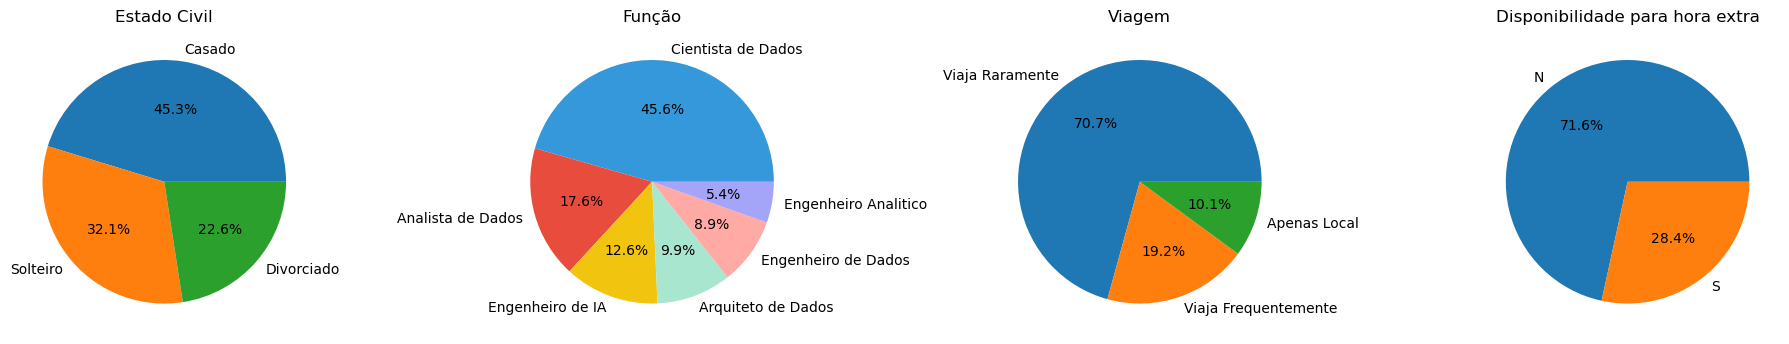

In [35]:
fig, (ax2, ax3, ax4, ax5) = plt.subplots(1,4, figsize=(18,10 ))

# Gráfico de pizza para Gênero
#ax1.pie(genero_agrup, labels=genero_agrup.index, colors=['#2a77db','#ffaaa5'], autopct='%1.1f%%')
#ax1.set_title('Genero')

# Gráfico de pizza para Estado Civil
ax2.pie(Estado_civil_agrup, labels=Estado_civil_agrup.index, autopct='%1.1f%%')
ax2.set_title('Estado Civil')

# Gráfico de pizza para Função
ax3.pie(Funcao_agrup, labels=Funcao_agrup.index, colors=['#3498DB', '#E74C3C', '#F1C40F','#A8E6CF','#FFAAA5','#A4A4F9'], autopct='%1.1f%%')
ax3.set_title('Função')

# Gráfico de pizza para Viagem
ax4.pie(Viagem_agrup, labels=Viagem_agrup.index, autopct='%1.1f%%')
ax4.set_title('Viagem')

# Grafico de pizza para Hora extra
ax5.pie(hora_extra, labels=hora_extra.index, autopct='%1.1f%%')
ax5.set_title('Disponibilidade para hora extra')

plt.tight_layout()
plt.show()

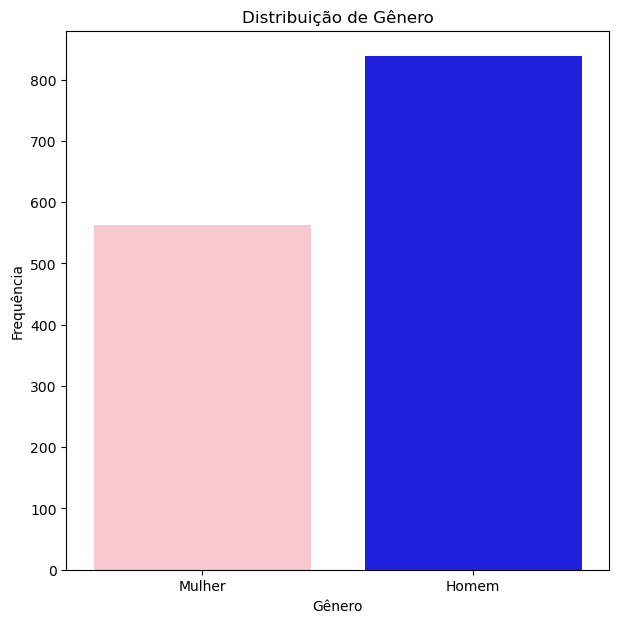

In [36]:
plt.figure(figsize=(7, 7))
sns.countplot(x='Genero', data=df, palette = (['pink','blue']))  # Passando a coluna como argumento x
plt.title('Distribuição de Gênero')
plt.xlabel('Gênero')
plt.ylabel('Frequência')
plt.show()

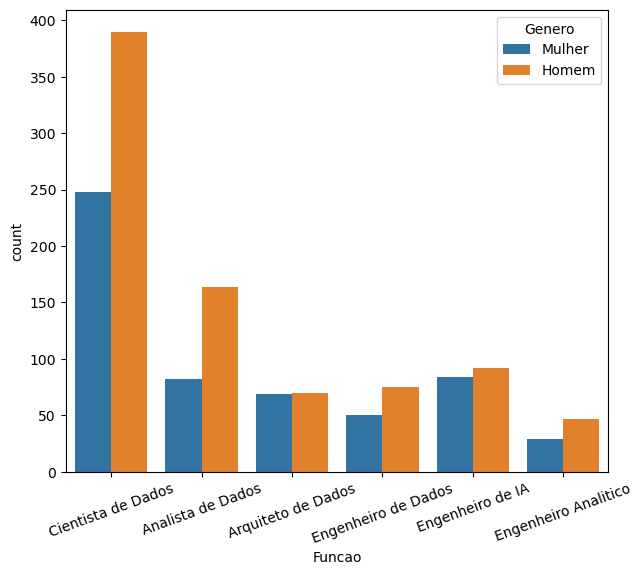

In [37]:
plt.figure(figsize=(7, 6))  # Ajusta o tamanho da figura
sns.countplot(data=df, x=df['Funcao'], hue=df['Genero'])  # Passa o DataFrame e as colunas como strings
plt.xticks(rotation=20)  # Rotaciona as labels do eixo X
plt.show()


In [38]:
Func_agrup = df.groupby('Funcao').agg({'Salario_Mensal' : 'mean'})
Func_agrup = Func_agrup.rename(columns={'Salario_Mensal' : 'Salario Mensal'})
Func_agrup

,Salario Mensal
Funcao,
Analista de Dados,3891.678862
Arquiteto de Dados,7793.201439
Cientista de Dados,5492.095611
Engenheiro Analitico,16220.342105
Engenheiro de Dados,7876.896000
Engenheiro de IA,11003.340909


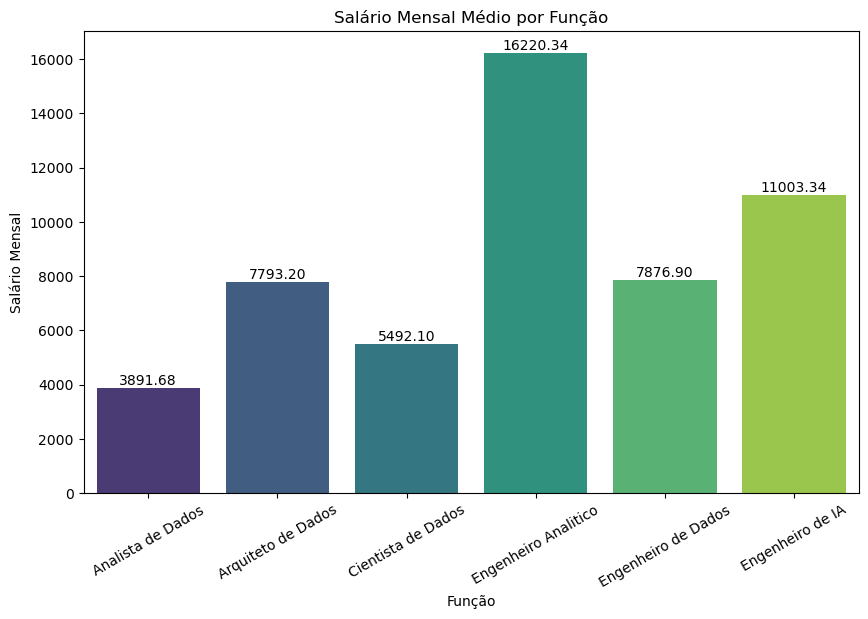

In [39]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=Func_agrup.index, y='Salario Mensal', data=Func_agrup, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom')
plt.title('Salário Mensal Médio por Função')
plt.xlabel('Função')
plt.ylabel('Salário Mensal')
plt.xticks(rotation=30)
plt.show()

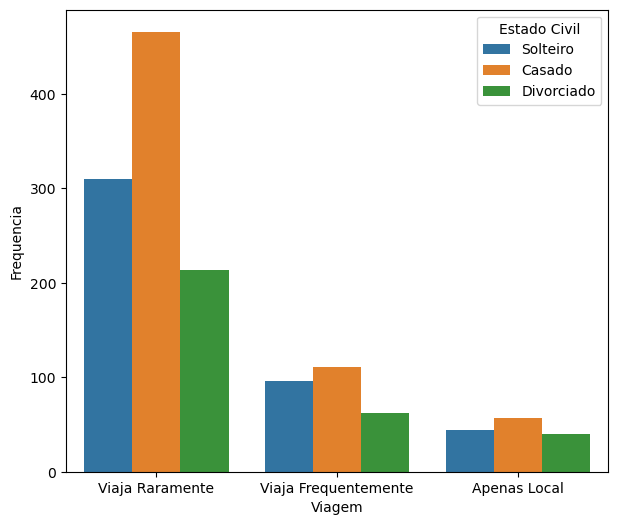

In [40]:
plt.figure(figsize=(7, 6))
sns.countplot(data=df, x = df['Viagem'], hue = df['Estado Civil'])
plt.ylabel('Frequencia')
plt.show()

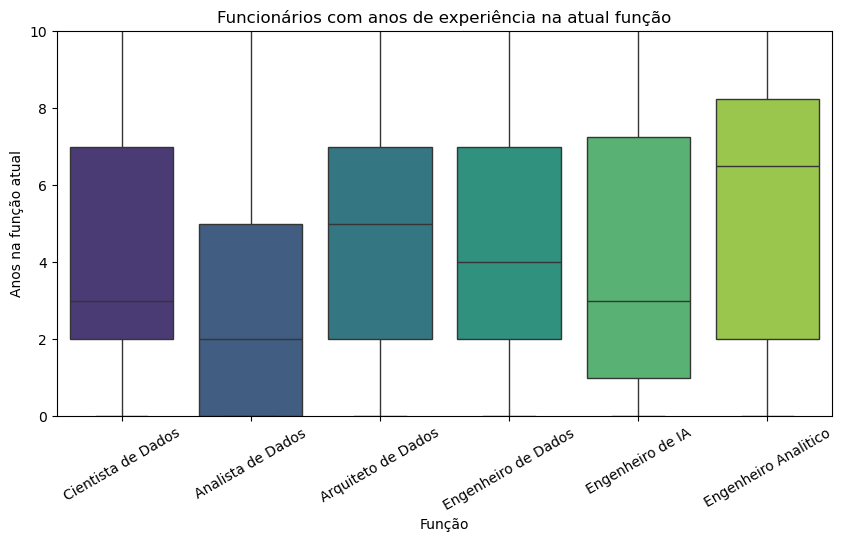

In [41]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Funcao', y='Anos_Funcao_Atual', data=df, palette='viridis')  # Escolha uma paleta simples
plt.ylim(0, 10)
plt.xlabel('Função')
plt.ylabel('Anos na função atual')
plt.title("Funcionários com anos de experiência na atual função")
plt.xticks(rotation=30)
plt.show()


(0.0, 11000.0)

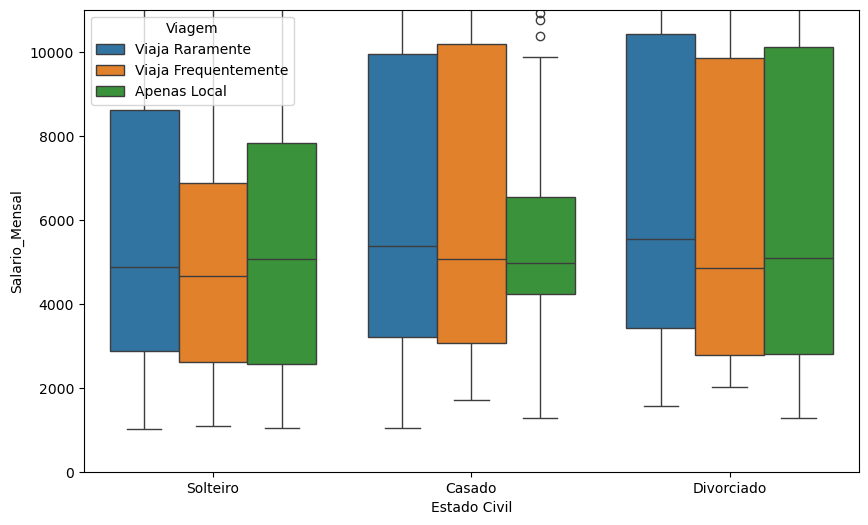

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Estado Civil'], y=df['Salario_Mensal'], hue=df['Viagem'])
plt.ylim(0,11000)

(0.0, 11000.0)

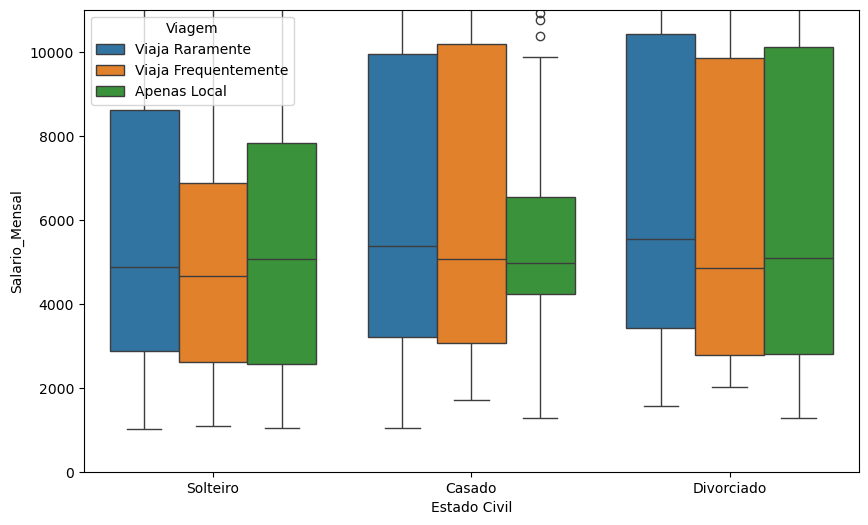

In [43]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Estado Civil'], y=df['Salario_Mensal'], hue=df['Viagem'])
plt.ylim(0,11000)

(0.0, 15000.0)

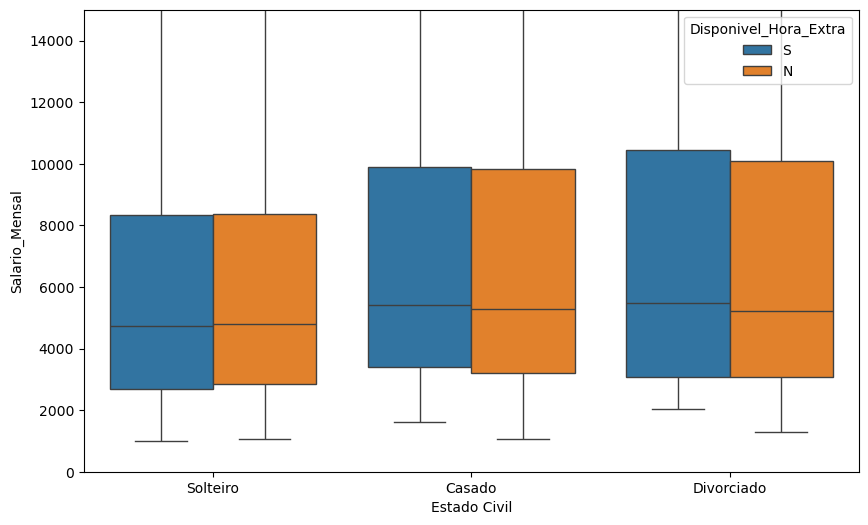

In [44]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Estado Civil'], y=df['Salario_Mensal'], hue=df['Disponivel_Hora_Extra'])
plt.ylim(0,15000)

In [45]:
df.columns

Index(['Id_Funcionario', 'Idade', 'Genero', 'Estado Civil', 'Departamento',
       'Funcao', 'Viagem', 'Valor Diaria', 'Indice_Envolvimento_Trabalho',
       'Nivel_Satisfacao_Trabalho', 'Salario_Mensal',
       'Numero_Empresas_Anteriores', 'Disponivel_Hora_Extra',
       'Percentual_Ultimo_Aumento_Salario', 'Aval_Performance',
       'Anos_Experiencia', 'Numero_Treinamentos_Ano_Anterior',
       'Anos_na_Empresa', 'Anos_Funcao_Atual', 'Anos_Desde_Ultima_Promocao',
       'Anos_com_Gerente_Atual'],
      dtype='object')

In [68]:
df.head()

,Id_Funcionario,Idade,Genero,Estado Civil,Departamento,Funcao,Viagem,Valor Diaria,Indice_Envolvimento_Trabalho,Nivel_Satisfacao_Trabalho,...,Numero_Empresas_Anteriores,Disponivel_Hora_Extra,Percentual_Ultimo_Aumento_Salario,Aval_Performance,Anos_Experiencia,Numero_Treinamentos_Ano_Anterior,Anos_na_Empresa,Anos_Funcao_Atual,Anos_Desde_Ultima_Promocao,Anos_com_Gerente_Atual
0,1,41,Mulher,Solteiro,Data Science,Cientista de Dados,Viaja Raramente,1102,3,4,...,8,S,11,3,8,0,6,4,0,5
1,2,49,Homem,Casado,Data Science,Cientista de Dados,Viaja Frequentemente,279,2,2,...,1,N,23,4,10,3,10,7,1,7
2,4,37,Homem,Solteiro,Data Science,Analista de Dados,Viaja Raramente,1373,2,3,...,6,S,15,3,7,3,0,0,0,0
3,5,33,Mulher,Casado,Data Science,Cientista de Dados,Viaja Frequentemente,1392,3,3,...,1,S,11,3,8,3,8,7,3,0
4,7,27,Homem,Casado,Data Science,Analista de Dados,Viaja Raramente,591,3,2,...,9,N,12,3,6,3,2,2,2,2


In [47]:
df.columns

Index(['Id_Funcionario', 'Idade', 'Genero', 'Estado Civil', 'Departamento',
       'Funcao', 'Viagem', 'Valor Diaria', 'Indice_Envolvimento_Trabalho',
       'Nivel_Satisfacao_Trabalho', 'Salario_Mensal',
       'Numero_Empresas_Anteriores', 'Disponivel_Hora_Extra',
       'Percentual_Ultimo_Aumento_Salario', 'Aval_Performance',
       'Anos_Experiencia', 'Numero_Treinamentos_Ano_Anterior',
       'Anos_na_Empresa', 'Anos_Funcao_Atual', 'Anos_Desde_Ultima_Promocao',
       'Anos_com_Gerente_Atual'],
      dtype='object')

In [48]:
dado = df.groupby(df['Anos_na_Empresa']).agg({'Salario_Mensal' : 'mean'})
dado.reset_index(inplace=True)

dado.head(2)

,Anos_na_Empresa,Salario_Mensal
0,0,4795.318182
1,1,5228.562874


In [49]:
dados_funcionario = df.groupby(df['Anos_na_Empresa']).agg('Salario_Mensal').mean().to_frame()
dados_funcionario

,Salario_Mensal
Anos_na_Empresa,
0,4795.318182
1,5228.562874
2,5671.932773
3,5205.420635
4,5917.633663
5,6092.213904
6,6072.100000
7,7192.954545
8,6553.551282


In [50]:
lista = ['Indice_Envolvimento_Trabalho',
       'Nivel_Satisfacao_Trabalho', 'Salario_Mensal',
       'Numero_Empresas_Anteriores',
       'Percentual_Ultimo_Aumento_Salario', 'Aval_Performance',
       'Anos_Experiencia', 'Numero_Treinamentos_Ano_Anterior',
       'Anos_na_Empresa', 'Anos_Funcao_Atual', 'Anos_Desde_Ultima_Promocao',
       'Anos_com_Gerente_Atual']

In [51]:
df[lista].corr()

,Indice_Envolvimento_Trabalho,Nivel_Satisfacao_Trabalho,Salario_Mensal,Numero_Empresas_Anteriores,Percentual_Ultimo_Aumento_Salario,Aval_Performance,Anos_Experiencia,Numero_Treinamentos_Ano_Anterior,Anos_na_Empresa,Anos_Funcao_Atual,Anos_Desde_Ultima_Promocao,Anos_com_Gerente_Atual
Indice_Envolvimento_Trabalho,1.000000,-0.020708,-0.016917,0.005771,-0.027794,-0.032899,-0.011671,-0.008190,-0.020771,0.012824,-0.023845,0.028256
Nivel_Satisfacao_Trabalho,-0.020708,1.000000,0.009786,-0.061318,0.019198,-0.002639,-0.021977,-0.001676,-0.007318,-0.007331,-0.023006,-0.026906
Salario_Mensal,-0.016917,0.009786,1.000000,0.155324,-0.034975,-0.007832,0.714475,0.006614,0.465250,0.328294,0.312407,0.309176
Numero_Empresas_Anteriores,0.005771,-0.061318,0.155324,1.000000,-0.004171,-0.007890,0.243949,-0.069220,-0.111494,-0.085378,-0.031494,-0.107237
Percentual_Ultimo_Aumento_Salario,-0.027794,0.019198,-0.034975,-0.004171,1.000000,0.776214,-0.027174,0.002308,-0.045464,-0.014412,-0.025733,-0.023852
Aval_Performance,-0.032899,-0.002639,-0.007832,-0.007890,0.776214,1.000000,0.000543,-0.011155,-0.007803,0.022440,0.010015,0.011405
Anos_Experiencia,-0.011671,-0.021977,0.714475,0.243949,-0.027174,0.000543,1.000000,-0.030816,0.626046,0.455465,0.407308,0.456186
Numero_Treinamentos_Ano_Anterior,-0.008190,-0.001676,0.006614,-0.069220,0.002308,-0.011155,-0.030816,1.000000,0.006148,-0.007237,-0.005868,-0.003509
Anos_na_Empresa,-0.020771,-0.007318,0.465250,-0.111494,-0.045464,-0.007803,0.626046,0.006148,1.000000,0.756951,0.620938,0.767254
Anos_Funcao_Atual,0.012824,-0.007331,0.328294,-0.085378,-0.014412,0.022440,0.455465,-0.007237,0.756951,1.000000,0.548268,0.712990


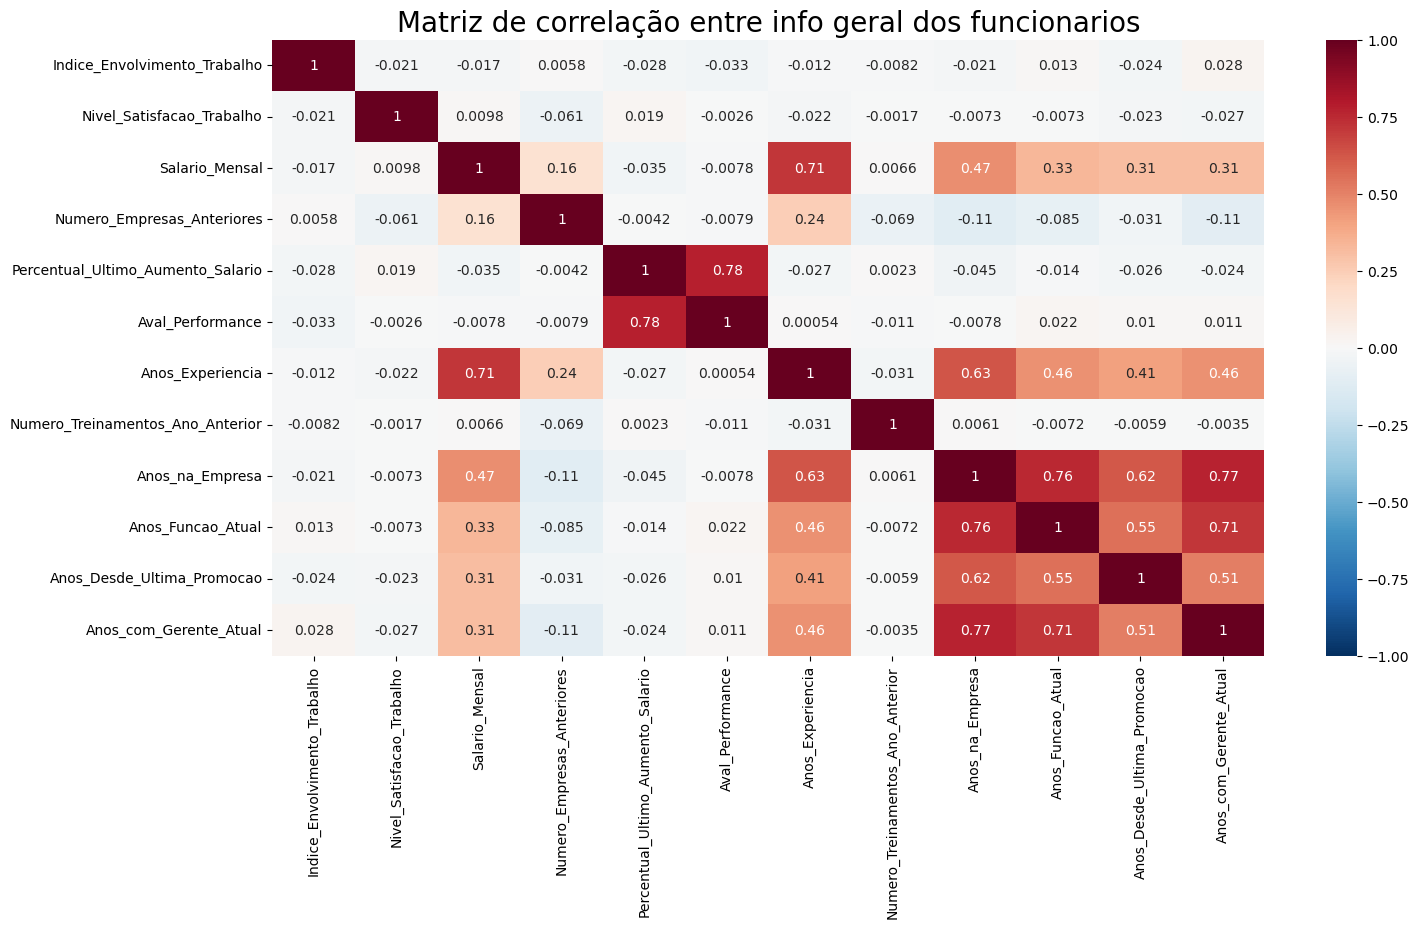

In [52]:
plt.figure(figsize=(16,8))
sns.heatmap(data=df[lista].corr(), cmap='RdBu_r', vmin = -1, vmax = 1, annot=True, linewidths=0)
plt.title('Matriz de correlação entre info geral dos funcionarios', fontsize=20)
plt.show()

In [53]:
df[lista].corr()

,Indice_Envolvimento_Trabalho,Nivel_Satisfacao_Trabalho,Salario_Mensal,Numero_Empresas_Anteriores,Percentual_Ultimo_Aumento_Salario,Aval_Performance,Anos_Experiencia,Numero_Treinamentos_Ano_Anterior,Anos_na_Empresa,Anos_Funcao_Atual,Anos_Desde_Ultima_Promocao,Anos_com_Gerente_Atual
Indice_Envolvimento_Trabalho,1.000000,-0.020708,-0.016917,0.005771,-0.027794,-0.032899,-0.011671,-0.008190,-0.020771,0.012824,-0.023845,0.028256
Nivel_Satisfacao_Trabalho,-0.020708,1.000000,0.009786,-0.061318,0.019198,-0.002639,-0.021977,-0.001676,-0.007318,-0.007331,-0.023006,-0.026906
Salario_Mensal,-0.016917,0.009786,1.000000,0.155324,-0.034975,-0.007832,0.714475,0.006614,0.465250,0.328294,0.312407,0.309176
Numero_Empresas_Anteriores,0.005771,-0.061318,0.155324,1.000000,-0.004171,-0.007890,0.243949,-0.069220,-0.111494,-0.085378,-0.031494,-0.107237
Percentual_Ultimo_Aumento_Salario,-0.027794,0.019198,-0.034975,-0.004171,1.000000,0.776214,-0.027174,0.002308,-0.045464,-0.014412,-0.025733,-0.023852
Aval_Performance,-0.032899,-0.002639,-0.007832,-0.007890,0.776214,1.000000,0.000543,-0.011155,-0.007803,0.022440,0.010015,0.011405
Anos_Experiencia,-0.011671,-0.021977,0.714475,0.243949,-0.027174,0.000543,1.000000,-0.030816,0.626046,0.455465,0.407308,0.456186
Numero_Treinamentos_Ano_Anterior,-0.008190,-0.001676,0.006614,-0.069220,0.002308,-0.011155,-0.030816,1.000000,0.006148,-0.007237,-0.005868,-0.003509
Anos_na_Empresa,-0.020771,-0.007318,0.465250,-0.111494,-0.045464,-0.007803,0.626046,0.006148,1.000000,0.756951,0.620938,0.767254
Anos_Funcao_Atual,0.012824,-0.007331,0.328294,-0.085378,-0.014412,0.022440,0.455465,-0.007237,0.756951,1.000000,0.548268,0.712990


<Axes: >

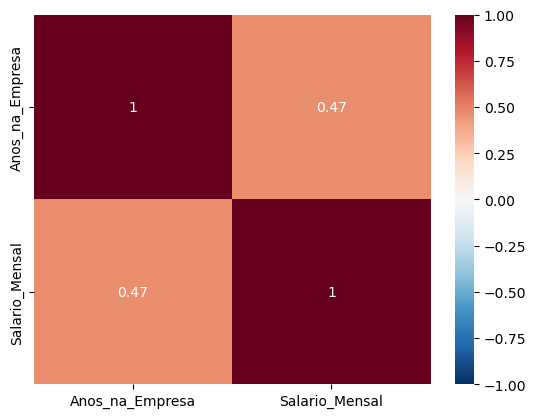

In [54]:
colunas = df[['Anos_na_Empresa','Salario_Mensal']]
#sns.heatmap(dado.corr(),cmap='RdBu_r', vmin= -1, vmax = 1, annot=True)
sns.heatmap(df[['Anos_na_Empresa','Salario_Mensal']].corr(),cmap='RdBu_r', vmin= -1, vmax = 1, annot=True)

Text(0, 0.5, 'Salario')

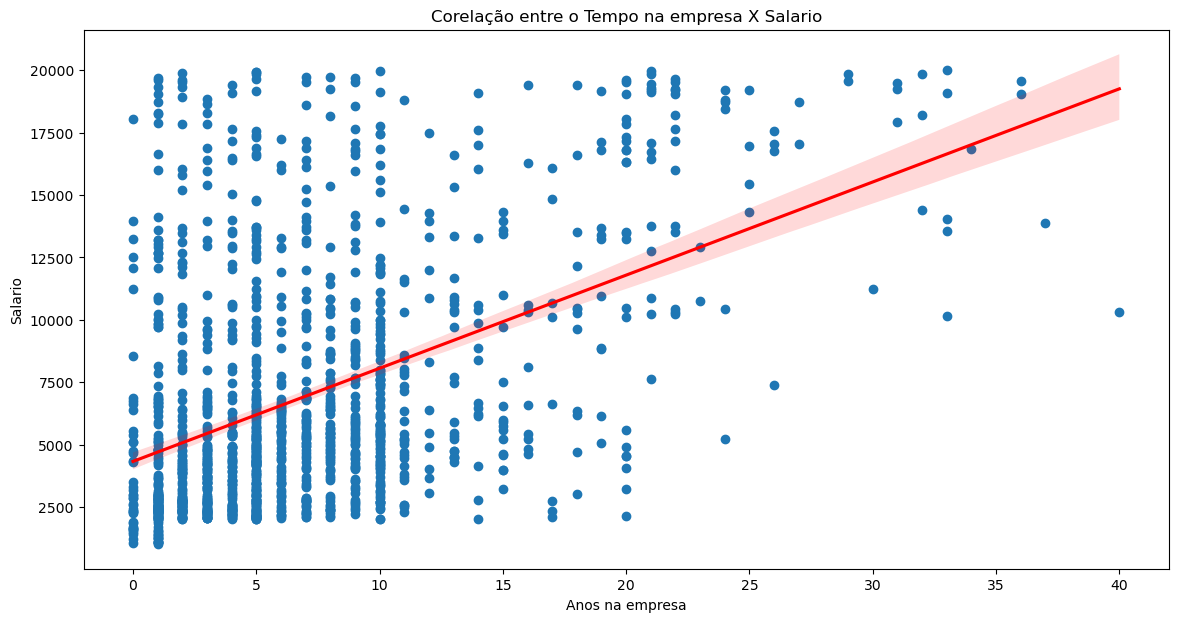

In [55]:
plt.figure(figsize=(14,7))

#yhat1 = modelo1.predict(dado['Anos_na_Empresa'])
plt.scatter(x='Anos_na_Empresa', y='Salario_Mensal', data=df)
#plt.plot(dado['Anos_na_Empresa'], yhat1, c='red')
sns.regplot(x='Anos_na_Empresa',y='Salario_Mensal', data=df,scatter=False, color='red')
plt.title("Corelação entre o Tempo na empresa X Salario")
plt.xlabel('Anos na empresa')
plt.ylabel('Salario')

In [56]:
# Correlação de Pearson

modelo1 = smf.ols(formula='Salario_Mensal ~ Anos_na_Empresa', data=df).fit()
print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:         Salario_Mensal   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     386.2
Date:                Fri, 16 Aug 2024   Prob (F-statistic):           4.07e-76
Time:                        11:08:24   Log-Likelihood:                -13722.
No. Observations:                1400   AIC:                         2.745e+04
Df Residuals:                    1398   BIC:                         2.746e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4326.5667    176.579     

### O R-quadrado ajustado é 71%. Isso significa que, depois de ajustar pelo número de preditores, aproximadamente 71% da variação no "Salario_Mensal" é explicada pela variável "Anos_na_Empresa". Podemos concluir que um funcionario em aproximadamente se inicia com um salario de R$ 4722.00, e que pode-se receber um aumento de R349,00 por ano na empresa  

In [65]:
modelo2 = smf.ols(formula='Salario_Mensal ~ Anos_Experiencia + Funcao' , data=df).fit()
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:         Salario_Mensal   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     380.9
Date:                Fri, 16 Aug 2024   Prob (F-statistic):          1.72e-289
Time:                        11:09:33   Log-Likelihood:                -13213.
No. Observations:                1400   AIC:                         2.644e+04
Df Residuals:                    1393   BIC:                         2.648e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

### O modelo de regressão revela que o salário mensal é significativamente impactado pelo cargo ocupado e pelos anos de experiência. Especificamente:

### O cargo desempenha um papel crucial na definição do salário: Profissionais em cargos como Engenheiro Analítico e Engenheiro de IA têm salários muito mais altos do que aqueles em outros cargos. Por exemplo, Engenheiros Analíticos ganham em média 7491.65 unidades a mais que o grupo de referência, enquanto Engenheiros de IA têm um adicional de 4302.45 unidades. Outros cargos especializados, como Arquiteto de Dados e Cientista de Dados, também apresentam salários elevados em comparação com o grupo de referência.

### A experiência contribui significativamente para o aumento do salário: Cada ano adicional de experiência está associado a um incremento médio de 344.25 unidades no salário mensal. Isso indica que a experiência profissional é um fator importante na determinação do salário.

### Esses resultados destacam a importância do cargo e da experiência na determinação do salário, com cargos especializados oferecendo maiores salários e a experiência contribuindo para aumentos salariais ao longo do tempo.

<Axes: xlabel='Anos_Experiencia', ylabel='Salario_Mensal'>

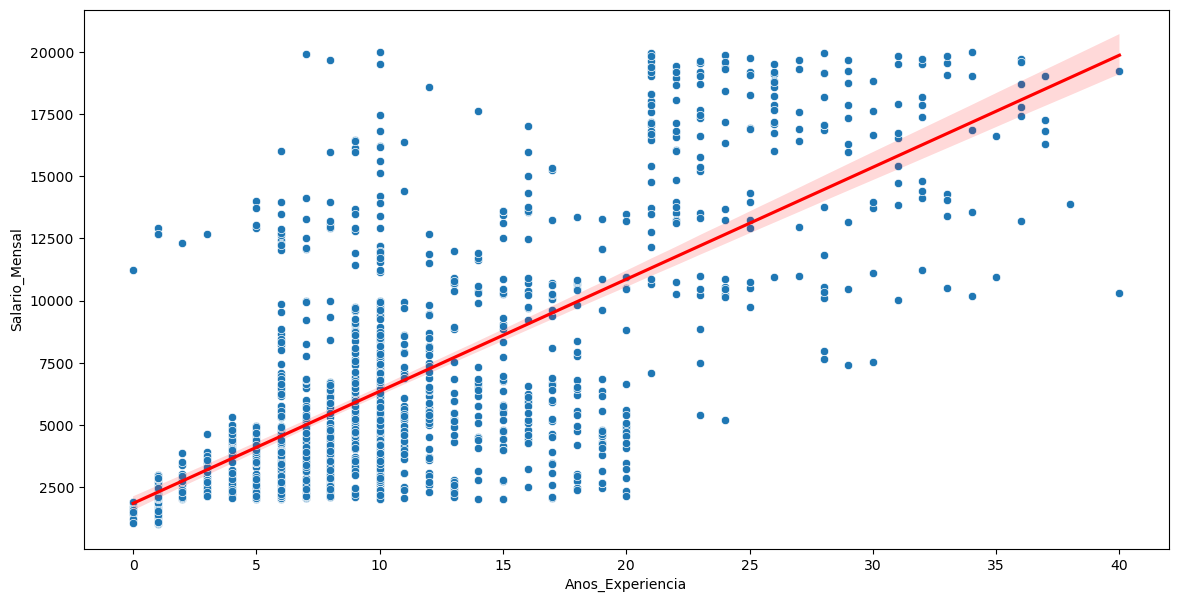

In [59]:
plt.figure(figsize=(14,7))
sns.scatterplot(x='Anos_Experiencia',y='Salario_Mensal', data=df)
sns.regplot(x='Anos_Experiencia', y='Salario_Mensal', data=df, scatter=False, color = 'red')

### A análise de regressão linear simples entre anos de experiência e salário mensal revelou que 51% da variação no salário pode ser explicada pelos anos de experiência. Cada ano adicional de experiência resulta em um aumento médio de 450,63 reais no salário mensal, com um salário inicial previsto de 1842,17 reais para alguém sem experiência.

### Os coeficientes são altamente significativos, indicando uma relação estatisticamente robusta entre experiência e salário. No entanto, 49% da variação no salário mensal é explicada por outros fatores não incluídos no modelo. Portanto, incluir variáveis adicionais como educação, habilidades e setor de atuação pode melhorar o entendimento da variação salarial.

In [60]:
df[['Percentual_Ultimo_Aumento_Salario', 'Aval_Performance']].head()

,Percentual_Ultimo_Aumento_Salario,Aval_Performance
0,11,3
1,23,4
2,15,3
3,11,3
4,12,3


<Axes: xlabel='Percentual_Ultimo_Aumento_Salario', ylabel='Aval_Performance'>

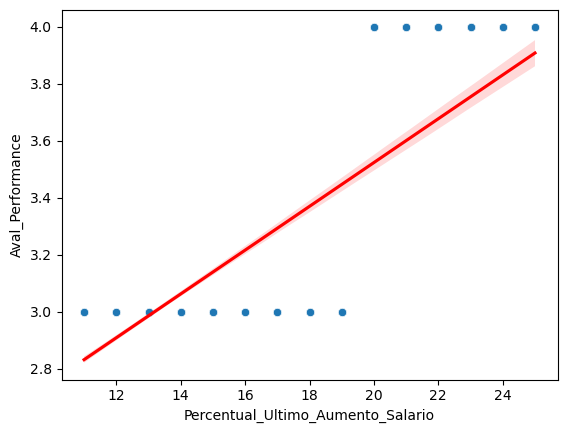

In [61]:
sns.scatterplot(x='Percentual_Ultimo_Aumento_Salario', y='Aval_Performance', data=df)
sns.regplot(x='Percentual_Ultimo_Aumento_Salario', y='Aval_Performance', data=df, scatter=False, color='red')

In [62]:
df['Aval_Performance'].nunique()

2

<Axes: xlabel='Anos_Funcao_Atual', ylabel='Anos_na_Empresa'>

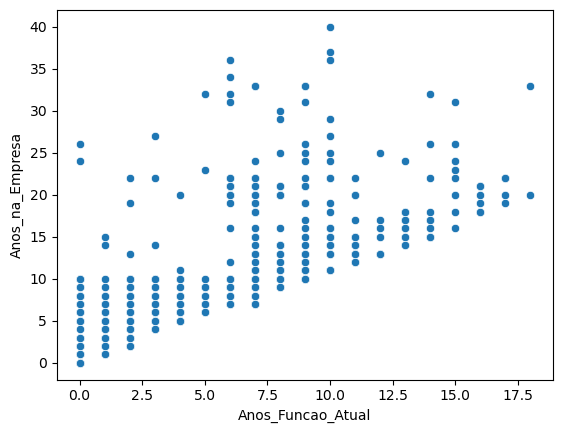

In [63]:
sns.scatterplot(x='Anos_Funcao_Atual', y='Anos_na_Empresa', data=df)


In [64]:
modelo3 = smf.ols(formula= 'Anos_na_Empresa ~ Anos_Funcao_Atual', data=df).fit()
print(modelo3.summary())

                            OLS Regression Results                            
Dep. Variable:        Anos_na_Empresa   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     1876.
Date:                Fri, 16 Aug 2024   Prob (F-statistic):          1.37e-260
Time:                        11:09:21   Log-Likelihood:                -3935.1
No. Observations:                1400   AIC:                             7874.
Df Residuals:                    1398   BIC:                             7885.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.5541      0.16